(756, 754)
Class distribution:
class
1    564
0    192
Name: count, dtype: int64


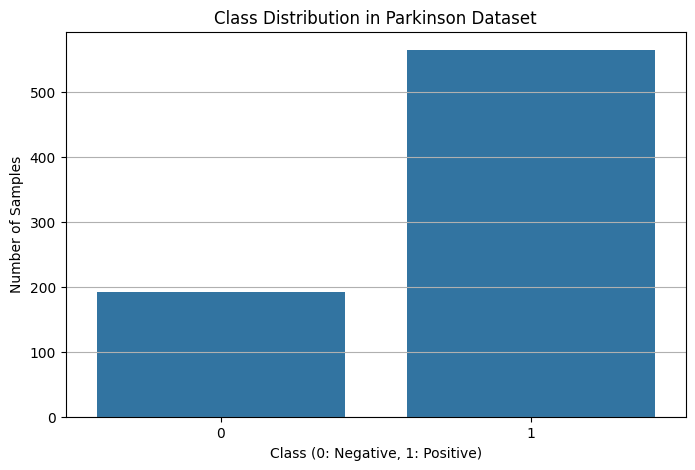

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Use custom PCA model
from pca_model import pca_transform, truncated_svd

# Use scikit-learn Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Use scikit-learn Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Read the data
df = pd.read_csv('data/parkinson.csv')

df = df.drop(columns='id')

# View the data's shape
print(df.shape)

# Check the balance of the target variable 'class'
class_counts = df['class'].value_counts()

# Print class counts
print("Class distribution:")
print(class_counts)

# Visualize the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution in Parkinson Dataset')
plt.xlabel('Class (0: Negative, 1: Positive)')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

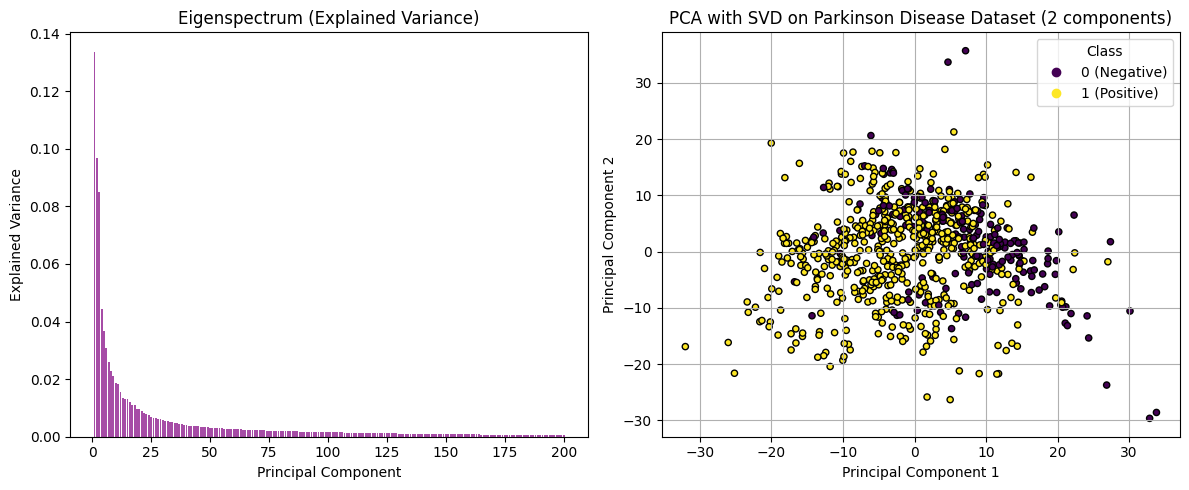

In [2]:
# Part 1: reducing to 2 principal components and visualize

# Extract features and labels
X = df.drop(columns='class').values
y = df['class'].values

# Center and standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform PCA with SVD for 2 components
X_transformed_two = pca_transform(X, method='singular_value_decomposition', num_components=2)

num_components_eigenspectrum=200
U_k, Sigma_k, V_kt = truncated_svd(X, num_components=num_components_eigenspectrum)

explained_variance = (Sigma_k**2) / np.sum(Sigma_k**2)

# Create the figure with subplots for the eigenspectrum and scatter plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, num_components_eigenspectrum + 1), explained_variance, color='purple', alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Eigenspectrum (Explained Variance)')

plt.subplot(1, 2, 2)

scatter = plt.scatter(X_transformed_two[:, 0], X_transformed_two[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)

plt.title('PCA with SVD on Parkinson Disease Dataset (2 components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

handles, _ = scatter.legend_elements()
labels = ['0 (Negative)', '1 (Positive)']
plt.legend(handles, labels, title="Class")

plt.grid(True)

plt.tight_layout()
plt.show()

In [3]:
# Part 2: Reduce to 200 principal components, use the first 500 samples as
# training data, then evaluate with an appropriate classifier

# Perform PCA with SVD for 200 components
X_transformed_200 = pca_transform(X, method='singular_value_decomposition', num_components=200)

# Split the data: use first 500 samples for training
X_train, X_test = X_transformed_200[:500], X_transformed_200[500:]
y_train, y_test = y[:500], y[500:]

# Train and evaluate Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, solver='lbfgs')
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression metrics
accuracy_logistic1 = accuracy_score(y_test, y_pred_logistic)
precision_logistic1 = precision_score(y_test, y_pred_logistic, average='macro')
recall_logistic1 = recall_score(y_test, y_pred_logistic, average='macro')
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Train and evaluate Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate Naive Bayes metrics
accuracy_nb1 = accuracy_score(y_test, y_pred_nb)
precision_nb1 = precision_score(y_test, y_pred_nb, average='macro')
recall_nb1 = recall_score(y_test, y_pred_nb, average='macro')
cm_nb = confusion_matrix(y_test, y_pred_nb)

print("Evaluation for approach: Transform then Split\n")

# Display Logistic Regression results
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_logistic1:.4f}")
print(f"Precision: {precision_logistic1:.4f}")
print(f"Recall: {recall_logistic1:.4f}")
print(f"Confusion Matrix:\n{cm_logistic}\n")

# Display Naive Bayes results
print("Naive Bayes Performance:")
print(f"Accuracy: {accuracy_nb1:.4f}")
print(f"Precision: {precision_nb1:.4f}")
print(f"Recall: {recall_nb1:.4f}")
print(f"Confusion Matrix:\n{cm_nb}\n")

Evaluation for approach: Transform then Split

Logistic Regression Performance:
Accuracy: 0.8008
Precision: 0.7695
Recall: 0.7747
Confusion Matrix:
[[ 57  24]
 [ 27 148]]

Naive Bayes Performance:
Accuracy: 0.7109
Precision: 0.6576
Recall: 0.6261
Confusion Matrix:
[[ 32  49]
 [ 25 150]]



In [4]:
# Part 3: Use the first 500 samples as training data, reduce to 200 
# principal components for both sets then evaluate with an appropriate classifier

# Split the data: use first 500 samples for training
X_train, X_test = X_transformed_200[:500], X_transformed_200[500:]
y_train, y_test = y[:500], y[500:]

# Transform both sets
X_train = pca_transform(X_train, method='singular_value_decomposition', num_components=200)
X_test = pca_transform(X_test, method='singular_value_decomposition', num_components=200)

# Train and evaluate Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, solver='lbfgs')
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression metrics
accuracy_logistic2 = accuracy_score(y_test, y_pred_logistic)
precision_logistic2 = precision_score(y_test, y_pred_logistic, average='macro')
recall_logistic2 = recall_score(y_test, y_pred_logistic, average='macro')
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Train and evaluate Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate Naive Bayes metrics
accuracy_nb2 = accuracy_score(y_test, y_pred_nb)
precision_nb2 = precision_score(y_test, y_pred_nb, average='macro')
recall_nb2 = recall_score(y_test, y_pred_nb, average='macro')
cm_nb = confusion_matrix(y_test, y_pred_nb)

print("Evaluation for approach: Split then Transform\n")

# Display Logistic Regression results
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_logistic2:.4f}")
print(f"Precision: {precision_logistic2:.4f}")
print(f"Recall: {recall_logistic2:.4f}")
print(f"Confusion Matrix:\n{cm_logistic}\n")

# Display Naive Bayes results
print("Naive Bayes Performance:")
print(f"Accuracy: {accuracy_nb2:.4f}")
print(f"Precision: {precision_nb2:.4f}")
print(f"Recall: {recall_nb2:.4f}")
print(f"Confusion Matrix:\n{cm_nb}\n")

Evaluation for approach: Split then Transform

Logistic Regression Performance:
Accuracy: 0.6016
Precision: 0.5338
Recall: 0.5328
Confusion Matrix:
[[ 28  53]
 [ 49 126]]

Naive Bayes Performance:
Accuracy: 0.6953
Precision: 0.6456
Recall: 0.5417
Confusion Matrix:
[[ 10  71]
 [  7 168]]



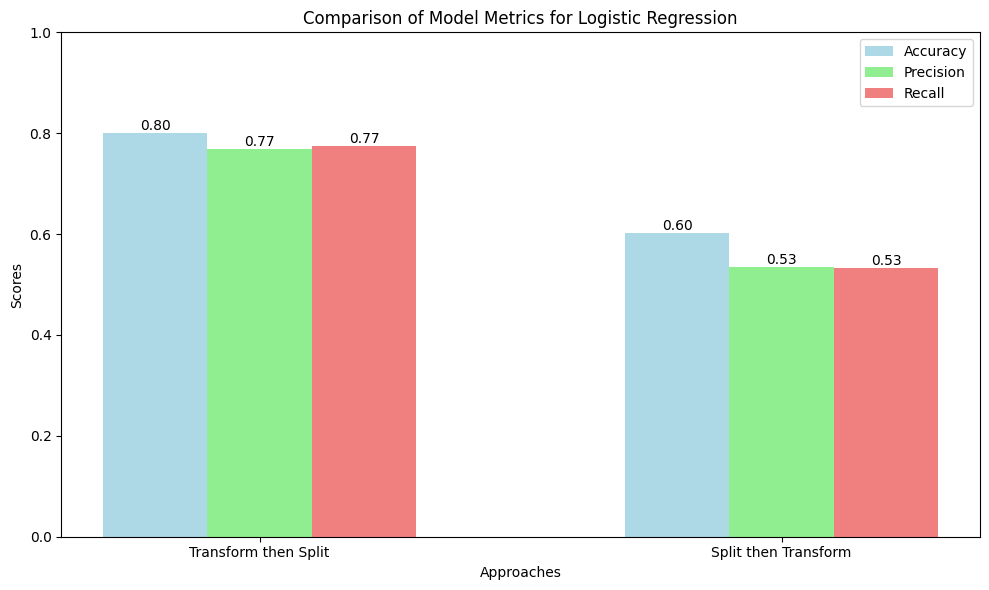

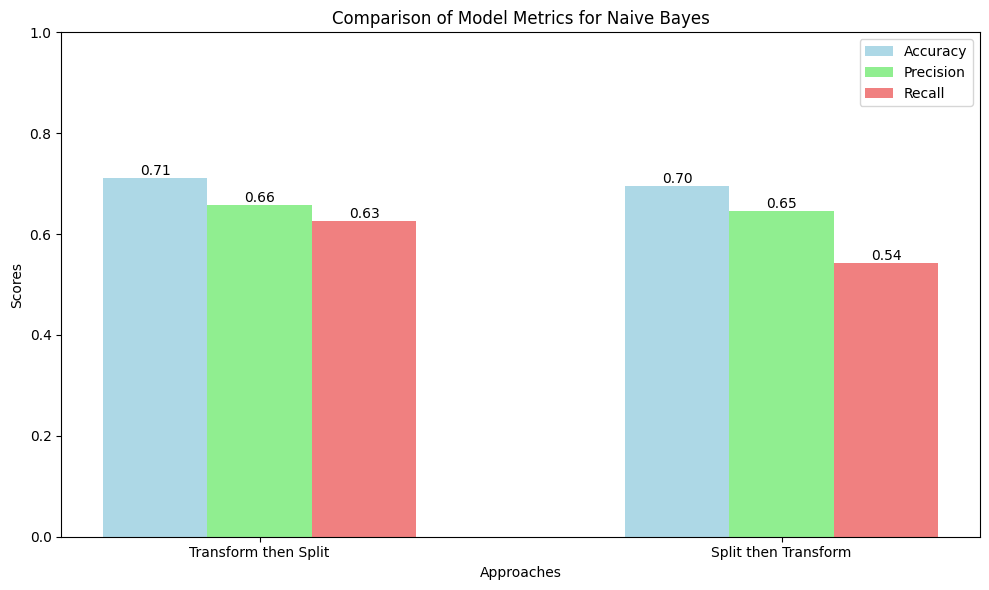

In [5]:
approaches = ['Transform then Split', 'Split then Transform']

def plot_metrics(metrics_df, model_name):
    plt.figure(figsize=(10, 6))
    
    bar_width = 0.2
    x = np.arange(len(metrics_df['Approach']))
    
    bars_acc = plt.bar(x - bar_width, metrics_df['Accuracy'], width=bar_width, label='Accuracy', color='lightblue')
    bars_prec = plt.bar(x, metrics_df['Precision'], width=bar_width, label='Precision', color='lightgreen')
    bars_recall = plt.bar(x + bar_width, metrics_df['Recall'], width=bar_width, label='Recall', color='lightcoral')

    for bars in [bars_acc, bars_prec, bars_recall]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    plt.xlabel('Approaches')
    plt.ylabel('Scores')
    plt.title(f'Comparison of Model Metrics for {model_name}')
    plt.xticks(x, metrics_df['Approach'])
    plt.ylim(0, 1)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Metrics DataFrame for Logistic Regression
logistic_metrics_df = pd.DataFrame({
    'Approach': approaches,
    'Accuracy': [accuracy_logistic1, accuracy_logistic2],
    'Precision': [precision_logistic1, precision_logistic2],
    'Recall': [recall_logistic1, recall_logistic2]
})

# Metrics DataFrame for Naive Bayes
naive_bayes_metrics_df = pd.DataFrame({
    'Approach': approaches,
    'Accuracy': [accuracy_nb1, accuracy_nb2],
    'Precision': [precision_nb1, precision_nb2],
    'Recall': [recall_nb1, recall_nb2]
})

# Plot for Logistic Regression
plot_metrics(logistic_metrics_df, model_name='Logistic Regression')

# Plot for Naive Bayes
plot_metrics(naive_bayes_metrics_df, model_name='Naive Bayes')

In [6]:
# Part 4: Find the k-components that explain at least 80% of the variance, then
# evaluate a classifier fitting to this new transformed data

# Extract features and labels
X = df.drop(columns='class').values
y = df['class'].values

# Center and standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform PCA with SVD for up to 200 components to find the optimal number
num_components_eigenspectrum = 200
U_k, Sigma_k, V_kt = truncated_svd(X, num_components=num_components_eigenspectrum)

# Calculate explained variance
explained_variance = (Sigma_k**2) / np.sum(Sigma_k**2)

# Print out the total explained variance for the first 200 components
total_variance_200 = np.sum(explained_variance[:num_components_eigenspectrum])
print(f'Total explained variance by the first 200 components: {total_variance_200:.4f}')

# Determine the number of components needed to explain at least 80% of the variance
cumulative_variance = np.cumsum(explained_variance)
num_components_80 = np.argmax(cumulative_variance >= 0.80) + 1  # +1 because np.argmax returns index

# Print out the number of components
print(f'Number of components needed to explain at least 80% of the variance: {num_components_80}')

# Perform PCA with SVD for the num_components that explains 80% of the variance
X_transformed_200 = pca_transform(X, method='singular_value_decomposition', num_components=num_components_80)

# Split the data: use first 500 samples for training
X_train, X_test = X_transformed_200[:500], X_transformed_200[500:]
y_train, y_test = y[:500], y[500:]

# Train and evaluate Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, solver='lbfgs')
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression metrics
accuracy_logistic80 = accuracy_score(y_test, y_pred_logistic)
precision_logistic80 = precision_score(y_test, y_pred_logistic, average='macro')
recall_logistic80 = recall_score(y_test, y_pred_logistic, average='macro')
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Train and evaluate Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate Naive Bayes metrics
accuracy_nb80 = accuracy_score(y_test, y_pred_nb)
precision_nb80 = precision_score(y_test, y_pred_nb, average='macro')
recall_nb80 = recall_score(y_test, y_pred_nb, average='macro')
cm_nb = confusion_matrix(y_test, y_pred_nb)

print("Evaluation for approach: Transform then Split, using k-components that explains 80% of the variance\n")

# Display Logistic Regression results
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_logistic80:.4f}")
print(f"Precision: {precision_logistic80:.4f}")
print(f"Recall: {recall_logistic80:.4f}")
print(f"Confusion Matrix:\n{cm_logistic}\n")

# Display Naive Bayes results
print("Naive Bayes Performance:")
print(f"Accuracy: {accuracy_nb80:.4f}")
print(f"Precision: {precision_nb80:.4f}")
print(f"Recall: {recall_nb80:.4f}")
print(f"Confusion Matrix:\n{cm_nb}\n")

Total explained variance by the first 200 components: 1.0000
Number of components needed to explain at least 80% of the variance: 52
Evaluation for approach: Transform then Split, using k-components that explains 80% of the variance

Logistic Regression Performance:
Accuracy: 0.8008
Precision: 0.7726
Recall: 0.7548
Confusion Matrix:
[[ 51  30]
 [ 21 154]]

Naive Bayes Performance:
Accuracy: 0.7344
Precision: 0.7066
Recall: 0.6234
Confusion Matrix:
[[ 26  55]
 [ 13 162]]



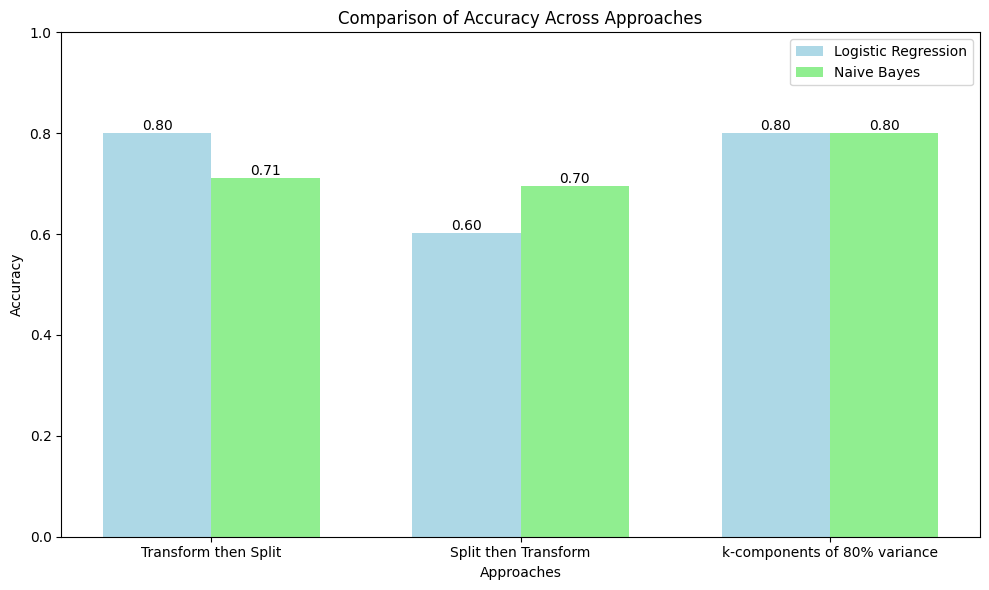

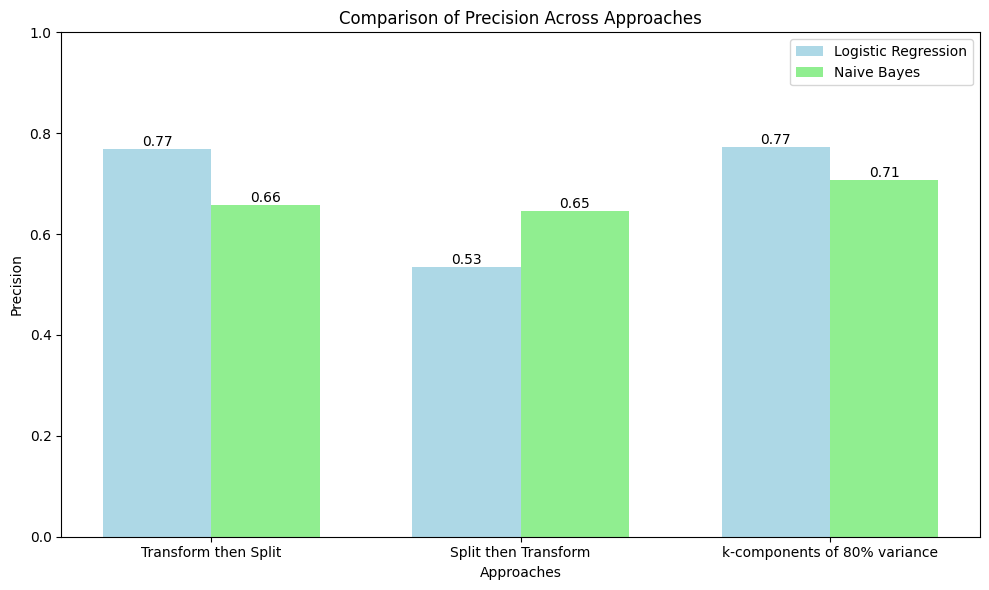

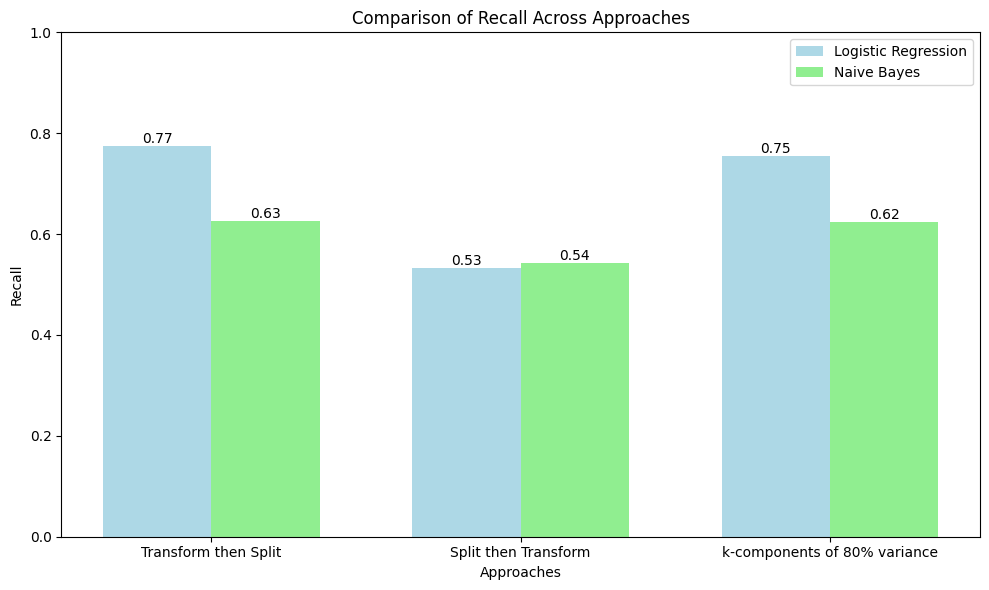

In [7]:
# Part 5: Compare all approaches and models so far:

approaches_final = ['Transform then Split', 'Split then Transform', 'k-components of 80% variance']
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [accuracy_logistic1, accuracy_logistic2, accuracy_logistic80, accuracy_nb1, accuracy_nb2, accuracy_logistic80]
precisions = [precision_logistic1, precision_logistic2, precision_logistic80, precision_nb1, precision_nb2, precision_nb80]
recalls = [recall_logistic1, recall_logistic2, recall_logistic80, recall_nb1, recall_nb2, recall_nb80]

metrics_data = {
    'Approach': approaches_final * 2,  # Repeat for each model
    'Model': ['Logistic Regression'] * len(approaches_final) + ['Naive Bayes'] * len(approaches_final),
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls
}

def plot_metrics(metrics_data, metric_name):
    plt.figure(figsize=(10, 6))

    bar_width = 0.35
    x = np.arange(len(approaches_final))

    bars_logistic = plt.bar(x - bar_width/2, metrics_data[metric_name][:len(approaches_final)], width=bar_width, label='Logistic Regression', color='lightblue')
    bars_nb = plt.bar(x + bar_width/2, metrics_data[metric_name][len(approaches_final):], width=bar_width, label='Naive Bayes', color='lightgreen')

    for bar in bars_logistic:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    for bar in bars_nb:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    plt.xlabel('Approaches')
    plt.ylabel(metric_name)
    plt.title(f'Comparison of {metric_name} Across Approaches')
    plt.xticks(x, approaches_final)
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot for Accuracy
plot_metrics(metrics_data, 'Accuracy')

# Plot for Precision
plot_metrics(metrics_data, 'Precision')

# Plot for Recall
plot_metrics(metrics_data, 'Recall')